<a href="https://colab.research.google.com/github/bushrahyderi/DL_Assignment/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 121MB/s]


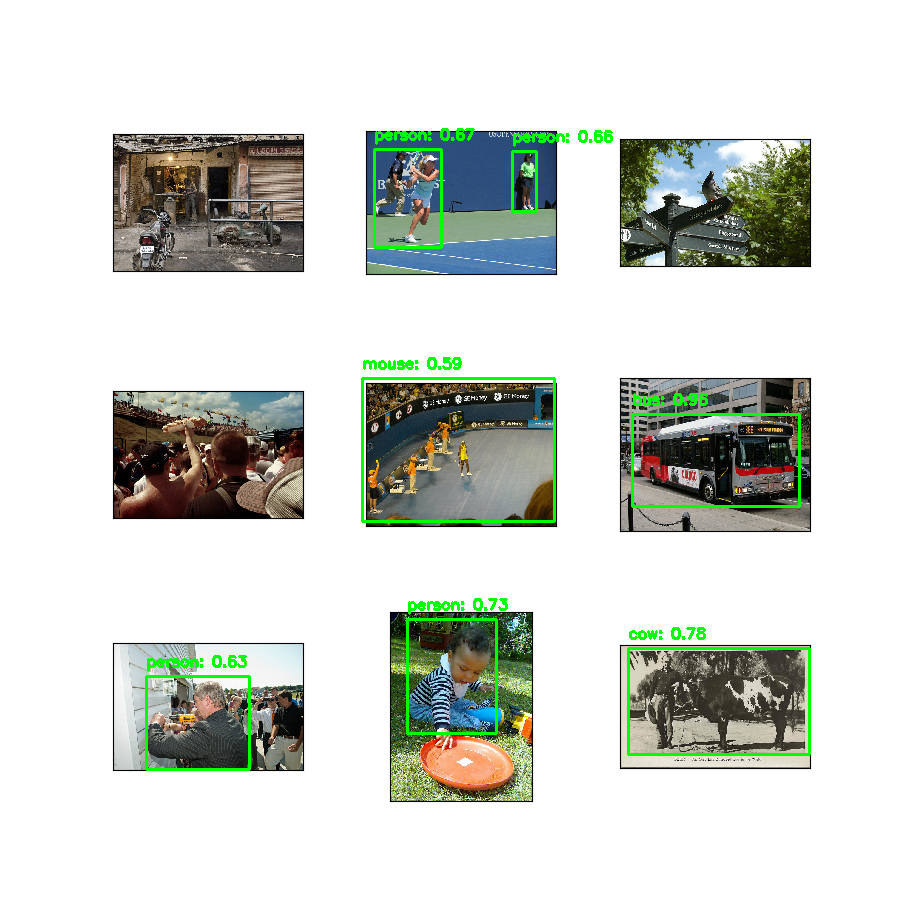

In [ ]:
from google.colab.patches import cv2_imshow
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np

# Load the pre-trained Faster R-CNN model with ResNet-50 backbone
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
COCO_INSTANCE_CATEGORY_NAMES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
    'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension for the model

    with torch.no_grad():
        prediction = model(image_tensor)

    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]

            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            # Draw the bounding box and label on the image
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return original_image

if __name__ == "__main__":
    image_path = '/content/coco.png'
    detected_image = detect_objects(image_path)

    if detected_image is not None:
        cv2_imshow(detected_image)

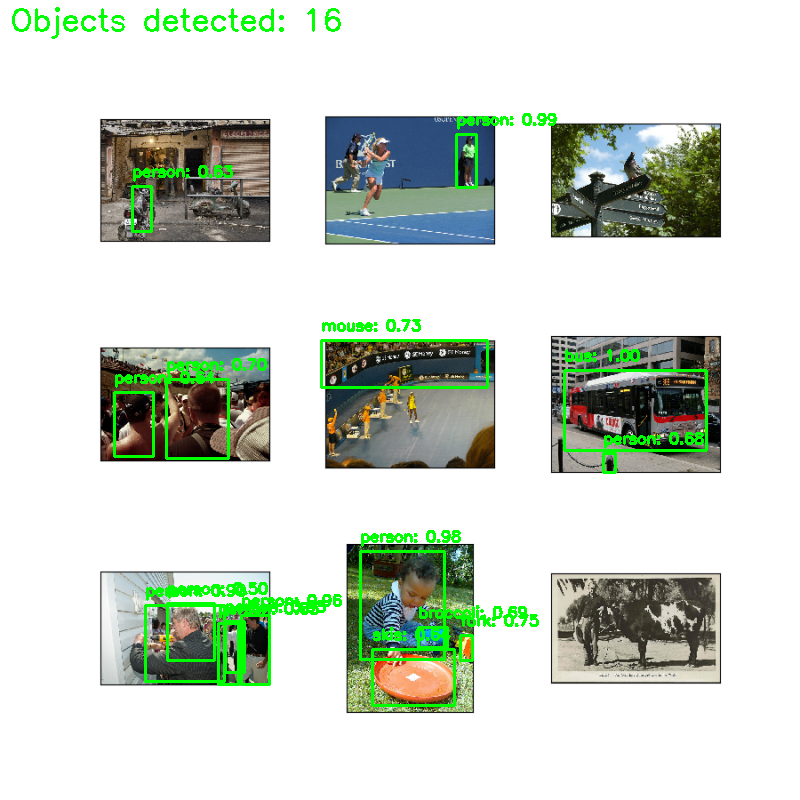

In [ ]:
from google.colab.patches import cv2_imshow
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
    'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

def resize_image(image, max_dim=800): #modification
    height, width = image.shape[:2]
    if max(height, width) > max_dim:
        scale = max_dim / max(height, width)
        new_width = int(width * scale)
        new_height = int(height * scale)
        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
        return resized_image
    return image  # Return the original image if it's already within the desired size

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None

    # Resize the image for faster processing
    resized_image = resize_image(image, max_dim=800)
    original_image = resized_image.copy()
    image_tensor = F.to_tensor(resized_image).unsqueeze(0)  # Add batch dimension for the model

    with torch.no_grad():
        prediction = model(image_tensor)

    # Extract prediction results
    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    # Count the number of detected objects
    num_detections = sum(1 for score in scores if score >= confidence_threshold) #modification

    # Add the number of detections to the image
    cv2.putText(original_image, f"Objects detected: {num_detections}",
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]

            # Adjust bounding box coordinates for resized image
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            # Draw bounding box
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)

            # Add label text
            cv2.putText(original_image, f"{label}: {score:.2f}",
                        (start_point[0], max(start_point[1] - 10, 10)),  # Ensure label is not cut off
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return original_image

if __name__ == "__main__":
    image_path = '/content/coco.png'  # Change this path to the image you are using
    confidence_threshold = 0.5  # Minimum confidence for detections

    detected_image = detect_objects(image_path, confidence_threshold)

    if detected_image is not None:
        cv2_imshow(detected_image)  # Display the image with detections


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 147MB/s]


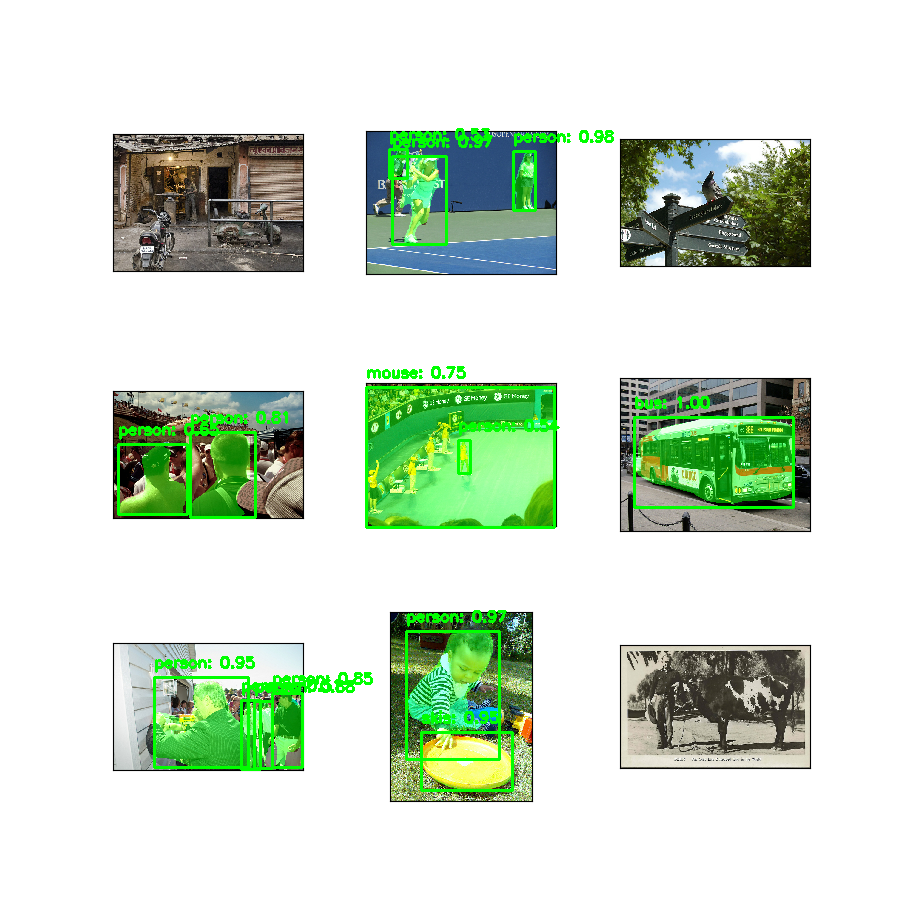

In [1]:
from google.colab.patches import cv2_imshow
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np

# Load the pre-trained Mask R-CNN model with ResNet-50 backbone
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
COCO_INSTANCE_CATEGORY_NAMES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
    'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension for the model

    with torch.no_grad():
        prediction = model(image_tensor)

    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    masks = prediction[0]['masks'].cpu().numpy()  # Extract masks

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]

            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            # Draw the bounding box and label on the image
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Process and overlay mask
            mask = masks[i, 0]  # Get the mask for the current object
            mask = (mask > 0.5).astype(np.uint8)  # Apply threshold to get binary mask
            colored_mask = np.zeros_like(original_image, dtype=np.uint8)
            colored_mask[:, :, 1] = mask * 255  # Green mask for visualization
            original_image = cv2.addWeighted(original_image, 1, colored_mask, 0.5, 0)

    return original_image

if __name__ == "__main__":
    image_path = '/content/coco.png'
    detected_image = detect_objects(image_path)

    if detected_image is not None:
        cv2_imshow(detected_image)
